# What is K-Means Clustering?

K-Means clustering is the most popular unsupervised machine learning algorithm. This is an algorithm that tries to minimize the distance of the points in a cluster with their centroid

## Steps in K-Means algorithm:
1. Choose the number of clusters K.
2. Select at random K points, the centroids(not necessarily from your dataset).
3. Assign each data point to the closest centroid → that forms K clusters.
4. Compute the mean of data points within a cluster and place the new centroid of each cluster.
5. Reassign each data point to the new closest centroid. If any reassignment . took place, go to step 4, otherwise, the model is ready.

## How to choose the value of K?
There are different techniques available to find the optimal value of K. The most common technique is the **elbow method.**
The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the Within cluster sum of square of the data points(WCSS) produced by different values of K. The below diagram shows how the elbow method works:-

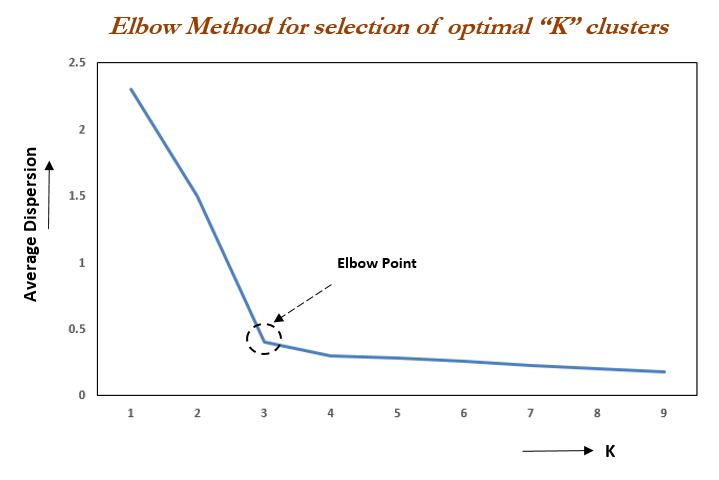

We can see that if K increases, average distortion will decrease. We should choose that k where the distortion decline drastically. From the above diagram the best value of k will be 3.

# Import libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

# Load dataset

In [ ]:
seller = pd.read_csv('/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv')

In [ ]:
# first five row
seller.head()

In [ ]:
# size of datset
seller.shape

In [ ]:
# statistical summary of numerical variables
seller.describe()

In [ ]:
# summary about dataset
seller.info()

We can see that, there are 3 categorical columns and remaining 9 numerical columns.

# Exploratory data analysis

In [ ]:
# check for missing values
seller.isna().sum() 

### Drop missing columns

In [ ]:
seller = seller.dropna(axis=1)

In [ ]:
# we have drop 4 columns
seller.isna().sum() 

### Explore categorical variables

In [ ]:
# check the unique values

print(seller['status_id'].unique())

In [ ]:
# check the number of unique values

print(seller['status_id'].nunique())

We can see that there are 6997 unique labels in the status_id variable. The total number of instances in the dataset is 7050. So, it is approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it.

In [ ]:
# check the unique values

seller['status_published'].unique()

In [ ]:
# check the number of unique values

print(seller['status_published'].nunique())

Again, we can see that there are 6913 unique labels in the status_published variable. The total number of instances in the dataset is 7050. So, it is also a approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it also.

In [ ]:
# check the unique values

seller['status_type'].unique()

In [ ]:
# check the number of unique values
seller['status_type'].nunique

We can see that there are 4 categories of labels in the status_type variable.



### Drop `status_id` and `status_published` variable from the dataset

In [ ]:
seller.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [ ]:
# check the summary
seller.info()

In [ ]:
sns.pairplot(seller)

# Declare feature vector and target variable

In [ ]:
X = seller

y = seller['status_type']

# Encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [ ]:
# check x
X.head()

# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_scal = MinMaxScaler()

X = min_scal.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[seller.columns])

In [ ]:
X.head()

# K-Means model with two clusters

In [ ]:
k_means = KMeans(n_clusters=2, random_state=42) 

k_means.fit(X)

In [ ]:
# model parameter study
k_means.cluster_centers_

* The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.
* The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.
* The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

# Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

And we can check model performances with interia and silhouette

### 1. Inertia
* Inertia is not a normalized metric.
* The lower values of inertia are better and zero is optimal.
* But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality). 
* Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

In [ ]:
# calculate model inertia

k_means.inertia_

### Observation
* The lesser the model inertia, the better the model fit.
* We can see that the model has very high inertia. So, this is not a good model fit to the data.

### 2.Silhouette Analysis
The silhouette is a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.
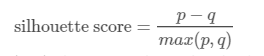
 
* p  is the mean distance to the points in the nearest cluster that the data point is not a part of

* q  is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1.

    * A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

    * A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

### 3. Lables

In [ ]:
labels = k_means.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: {} out of {} samples were correctly labeled.".format(correct_labels, y.size))

In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

We have achieved a weak classification accuracy of 1% by our unsupervised model.

# Use elbow method to find optimal number of clusters

In [ ]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 7)
    
    kmeans.fit(X)
    
    cs.append(kmeans.inertia_)

# plot the 
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- By the above plot, we can see that there is a kink at k=2.

- Hence k=2 can be considered a good number of the cluster to cluster this data.

- But, we have seen that I have achieved a weak classification accuracy of 1% with k=2.

- we will try with k=4,5

#  K-Means model with different clusters

In [ ]:
# K-Means model with 3 clusters

k_means3 = KMeans(n_clusters=3,max_iter = 400, n_init = 10, random_state=7)

k_means3.fit(X)

# check how many of the samples were correctly labeled
labels = k_means3.labels_

correct_labels3 = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels3, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels3/float(y.size)))

In [ ]:
# Inertia
print("Inertia: ",k_means3.inertia_)

# silhouette score
silhouette_avg3 = silhouette_score(X, (k_means3.labels_))
print("The silhouette score is ", silhouette_avg3)

In [ ]:
# K-Means model with 4 clusters

k_means4 = KMeans(n_clusters=4, max_iter = 400, n_init = 10, random_state=7)

k_means4.fit(X)

# check how many of the samples were correctly labeled
labels = k_means4.labels_

correct_labels4 = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels4, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels4/float(y.size)))

In [ ]:
# Inertia
print("Inertia: ",k_means4.inertia_)

# silhouette score
silhouette_avg4 = silhouette_score(X, (k_means4.labels_))
print("The silhouette score is ", silhouette_avg4)

**We have achieved a relatively high accuracy of 62% with k=4.**